
English_Malayalam_Multimodal_Machine_Translation with attention

In [ ]:

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.image as mp

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/My Drive/Main/train.mn.txt') as file:
    train_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train.en.txt') as file:
    train_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/train_images.txt') as file:
    train_images = file.read().split('\n')


In [ ]:
with open('/content/drive/My Drive/Main/maldev.txt') as file:
    dev_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/endev.txt') as file:
    dev_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/devimage.txt') as file:
    dev_images = file.read().split('\n')

In [ ]:
with open('/content/drive/My Drive/Main/maltest.txt') as file:
   test_mal_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/engtest.txt') as file:
   test_eng_txt = file.read().split('\n')
with open('/content/drive/My Drive/Main/testimages.txt') as file:
    test_images = file.read().split('\n')

In [ ]:
def remove(mal_txt,eng_txt):
        mal_txt.pop()
        mal_txt.pop()
        eng_txt.pop()
        eng_txt.pop()
        #trainimages.pop()
        #trainimages,link
        print(len(mal_txt))
        print(len(eng_txt))
        #print(len(trainimages))
        #img_path=[]
        #for s in trainimages:
                 #img_path.append(link+s)
        #return mal_txt,eng_txt,train_images,img_path
        return mal_txt,eng_txt

In [ ]:
##training image
#link="/content/drive/My Drive/Main/trainimages/train/"
train_mal_txt,train_eng_txt=remove(train_mal_txt,train_eng_txt)

28930
28931


In [ ]:
testvgg_feature=np.load('/content/drive/My Drive/Main/testfeature.npy', encoding='bytes')

In [ ]:
#dev image
#link="/content/drive/My Drive/Main/trainimages/train/"
dev_mal_txt,dev_eng_txt=remove(dev_mal_txt,dev_eng_txt)

997
998


In [ ]:
test_mal_txt,test_eng_txt=remove(test_mal_txt,test_eng_txt)

1399
1399


In [ ]:
ttmal_df = pd.DataFrame(test_mal_txt, columns=['Malayalam']) 
tteng_df = pd.DataFrame(test_eng_txt, columns=['English']) 

In [ ]:
ttmal_text1 = ttmal_df["Malayalam"].apply(clean_text)
tteng_text1 = tteng_df["English"].apply(clean_text)
ttmal_text2 = list(ttmal_text1.values)
tteng_text2 = list(tteng_text1.values)

In [ ]:
x_tt=tteng_text2
y_tt=ttmal_text2

In [ ]:
x_tt[1]

'knife block sitting on counter with knives in it'

In [ ]:
y_tt[1]

'sos കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക് eos'

In [ ]:
ttmal_temp=[]
for s in ttmal_text2:
    tttemp="sos "+s+" eos"
    ttmal_temp.append(tttemp)
#text2=[]
ttmal_text2=ttmal_temp
ttmal_text2[1:10]

['sos കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക് eos',
 'sos ചട്ടിയിൽ രണ്ടാമത്തെ പിസ്സ eos',
 'sos ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു eos',
 'sos ടാൻ ഹൗസിലെ ഇളം നിറമുള്ള രണ്ടാം നില eos',
 'sos കെട്ടിടങ്ങളുടെ രണ്ടാമത്തെ നിലയിലെ ബാൽക്കണി eos',
 'sos രാത്രി സ്റ്റാന്റിലെ വിളക്ക് കട്ടിലിന്റെ ഇടതുവശത്ത് നിൽക്കുന്നു eos',
 'sos നൈറ്റ് സ്റ്റാൻഡിന് മുകളിൽ ഒരു വെളുത്ത അലാറം ക്ലോക്ക് ഉണ്ട് eos',
 'sos ഒരു കറുത്ത സംഗീത സ്റ്റാൻഡ് eos',
 'sos തെരുവ് മുറിച്ചുകടക്കാൻ കാത്തിരിക്കുന്ന സ്ത്രീ eos']

In [ ]:
trmal_df = pd.DataFrame(train_mal_txt, columns=['Malayalam']) 
treng_df = pd.DataFrame(train_eng_txt, columns=['English']) 

In [ ]:
#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text

In [ ]:
trmal_text1 = trmal_df["Malayalam"].apply(clean_text)
treng_text1 = treng_df["English"].apply(clean_text)
trmal_text2 = list(trmal_text1.values)
treng_text2 = list(treng_text1.values)

In [ ]:
trmal_text2[0]

'ശാന്തമായ  കടലിൽ സർഫിങ് നടത്തുന്ന പുരുഷ സർഫർ'

In [ ]:
trmal_temp=[]
for s in trmal_text2:
    trtemp="sos "+s+" eos"
    trmal_temp.append(trtemp)
#text2=[]
trmal_text2=trmal_temp
trmal_text2[1:10]

['sos ഇത് ഒരു ഇൻഡോർ രംഗമാണ് eos',
 'sos കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാക്കി eos',
 'sos മനുഷ്യന് ചെറിയ മുടിയുണ്ട് eos',
 'sos ഫോട്ടോ ആൽബം മുതിർന്നവരുടെ മടിയിൽ തുറക്കുന്നു eos',
 'sos കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട് eos',
 'sos ഒരു ഉന്തുവണ്ടിയിലെ കുട്ടി eos',
 'sos ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ് eos',
 'sos മതിൽ വെളുത്ത ചായം പൂശി eos',
 'sos ചാരനിറത്തിലുള്ള റോഡിന്റെ വശങ്ങളിൽ പച്ച പുല്ലിന്റെ സ്ട്രിപ്പുകൾ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


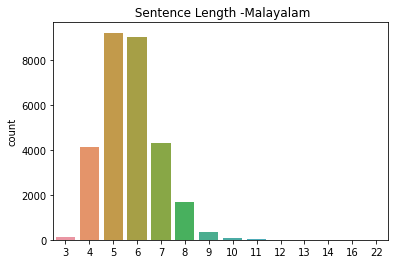

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
trmalayalam_words = []
for i in trmal_text2:
    trmalayalam_words.append(len(i.split()))
sn.countplot(trmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


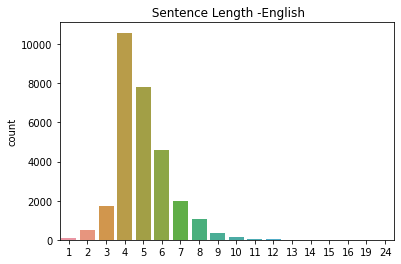

In [ ]:
trenglish_words = []
for j in treng_text2:
    trenglish_words.append(len(j.split()))
sn.countplot(trenglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
trmaxlen_malayalam = max(trmalayalam_words)
trmaxlen_english = max(trenglish_words)
print('Maximum sentence length-Malayalam :',trmaxlen_malayalam)
print('Maximum sentence length-English :',trmaxlen_english)

Maximum sentence length-Malayalam : 22
Maximum sentence length-English : 24


In [ ]:
#dev

#Datacleaning by removing special characters
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r" ᠃", "", text)
    text = re.sub(r" ᠂", "", text)
    text = re.sub(r"-", " ", text)
    text = re.sub(r"<5>", "5", text)
    text = re.sub(r"“ ", "", text)
    text = re.sub(r" ”", "", text)
    text = re.sub(r"[+\.\!\/_,$%^*(+\"\']+|[+——！，〈〉《》。︱？?、．％~@#￥%……&*（）’]", "", text)
    text=text.rstrip()
    return text

In [ ]:
dmal_df = pd.DataFrame(dev_mal_txt, columns=['Malayalam']) 
deng_df = pd.DataFrame(dev_eng_txt, columns=['English']) 

In [ ]:
dmal_text1 = dmal_df["Malayalam"].apply(clean_text)
deng_text1 = deng_df["English"].apply(clean_text)
dmal_text2 = list(dmal_text1.values)
deng_text2 = list(deng_text1.values)

In [ ]:
dmal_temp=[]
for s in dmal_text2:
    dtemp="sos "+s+" eos"
    dmal_temp.append(dtemp)
#text2=[]
dmal_text2=dmal_temp
dmal_text2[1:10]

['sos ഒരു കെട്ടിടത്തിന്റെ വിൻഡോ eos',
 'sos ഡ്രോയറുകളുള്ള ഇരുണ്ട ചാരനിറത്തിലുള്ള കമ്പ്യൂട്ടർ ഡെസ്ക് eos',
 'sos നിലത്ത് നാല് കാലുകളുള്ള ഉരുക്ക് കസേര eos',
 'sos തെരുവിൽ സൈക്കിൾ ചവിട്ടുന്ന മനുഷ്യൻ eos',
 'sos ഈ കാറുകൾ അഴുക്കിൽ പാർക്ക് ചെയ്തിരിക്കുന്നു eos',
 'sos ആകാശത്ത് വെളുത്ത മേഘങ്ങൾ eos',
 'sos ഗ്ലാസ് വാതിലുകളുടെ ഗണം eos',
 'sos പ്രൊജക്ടർ സ്ക്രീൻ ചുരുട്ടി വെച്ചിരിക്കുന്നു eos',
 'sos ചാരനിറത്തിലുള്ള സ്വെറ്റർ ധരിച്ച മനുഷ്യൻ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


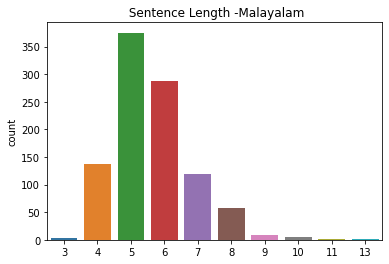

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
dmalayalam_words = []
for i in dmal_text2:
    dmalayalam_words.append(len(i.split()))
sn.countplot(dmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


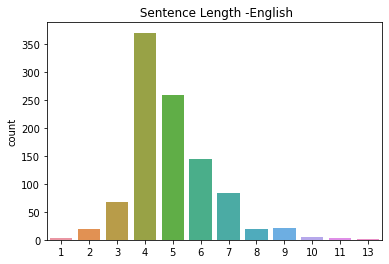

In [ ]:
denglish_words = []
for j in deng_text2:
    denglish_words.append(len(j.split()))
sn.countplot(denglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
dmaxlen_malayalam = max(dmalayalam_words)
dmaxlen_english = max(denglish_words)
print('Maximum sentence length-Malayalam :',dmaxlen_malayalam)
print('Maximum sentence length-English :',dmaxlen_english)

Maximum sentence length-Malayalam : 13
Maximum sentence length-English : 13


In [ ]:
ttmal_df = pd.DataFrame(test_mal_txt, columns=['Malayalam']) 
tteng_df = pd.DataFrame(test_eng_txt, columns=['English']) 

In [ ]:
ttmal_text1 = ttmal_df["Malayalam"].apply(clean_text)
tteng_text1 = tteng_df["English"].apply(clean_text)
ttmal_text2 = list(ttmal_text1.values)
tteng_text2 = list(tteng_text1.values)

In [ ]:
ttmal_temp=[]
for s in ttmal_text2:
    tttemp="sos "+s+" eos"
    ttmal_temp.append(tttemp)
#text2=[]
ttmal_text2=ttmal_temp
ttmal_text2[1:10]

['sos കത്തികൊണ്ട് കൗണ്ടറിൽ ഇരിക്കുന്ന കത്തി ബ്ലോക്ക് eos',
 'sos ചട്ടിയിൽ രണ്ടാമത്തെ പിസ്സ eos',
 'sos ബീജ് സ്റ്റെയർ വേ രണ്ടാം ലെവലിലേക്ക് പോകുന്നു eos',
 'sos ടാൻ ഹൗസിലെ ഇളം നിറമുള്ള രണ്ടാം നില eos',
 'sos കെട്ടിടങ്ങളുടെ രണ്ടാമത്തെ നിലയിലെ ബാൽക്കണി eos',
 'sos രാത്രി സ്റ്റാന്റിലെ വിളക്ക് കട്ടിലിന്റെ ഇടതുവശത്ത് നിൽക്കുന്നു eos',
 'sos നൈറ്റ് സ്റ്റാൻഡിന് മുകളിൽ ഒരു വെളുത്ത അലാറം ക്ലോക്ക് ഉണ്ട് eos',
 'sos ഒരു കറുത്ത സംഗീത സ്റ്റാൻഡ് eos',
 'sos തെരുവ് മുറിച്ചുകടക്കാൻ കാത്തിരിക്കുന്ന സ്ത്രീ eos']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


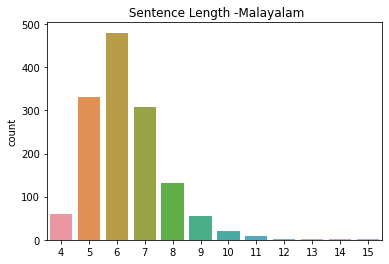

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
ttmalayalam_words = []
for i in ttmal_text2:
    ttmalayalam_words.append(len(i.split()))
sn.countplot(ttmalayalam_words).set(title=' Sentence Length -Malayalam')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


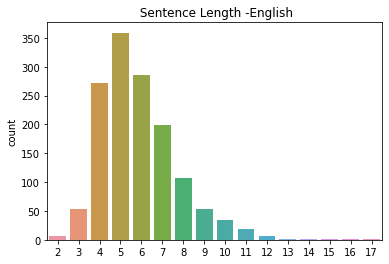

In [ ]:
ttenglish_words = []
for j in tteng_text2:
    ttenglish_words.append(len(j.split()))
sn.countplot(ttenglish_words).set(title=' Sentence Length -English')
plt.show()

In [ ]:
ttmaxlen_malayalam = max(ttmalayalam_words)
ttmaxlen_english = max(ttenglish_words)
print('Maximum sentence length-Malayalam :',ttmaxlen_malayalam)
print('Maximum sentence length-English :',ttmaxlen_english)

Maximum sentence length-Malayalam : 15
Maximum sentence length-English : 17


In [ ]:
x_tr=treng_text2
y_tr=trmal_text2
x_val=deng_text2
y_val=dmal_text2


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
x_tokens = Tokenizer()
x_tokens.fit_on_texts(x_tr)
x_tr = x_tokens.texts_to_sequences(x_tr)
x_val = x_tokens.texts_to_sequences(x_val)
print('x_tr:',x_tr)
print('x_val:',x_val)

x_tr: [[432, 237, 187, 6, 1418, 6, 2, 173], [145, 5, 29, 2227, 252], [146, 1864, 506, 3], [8, 51, 244, 79], [166, 2228, 168, 3, 29, 2987, 688], [238, 5, 1, 135, 4, 419, 449, 2, 10, 59], [157, 6, 1, 977], [118, 109, 2988], [25, 5, 311, 7], [238, 27, 336, 807, 3, 2, 25], [15, 496, 2, 173], [14, 5, 29, 751, 2989], [212, 1035, 440], [2990, 5, 3, 1, 30], [1, 7, 352, 344], [7, 689, 345, 263, 715], [18, 441, 33, 11, 83], [8, 6, 96, 230, 346, 3, 28], [50, 3, 2, 28], [1, 8, 32, 6, 614, 411], [450, 121, 3, 25], [319, 4, 2, 133], [50, 4, 1, 94], [2, 442, 5, 170], [1, 8, 582, 1, 364], [1, 18, 885, 6, 26], [208, 11, 843, 469], [258, 3, 2, 44], [1, 546, 7, 44], [10, 214, 516], [1, 18, 1280, 583, 6, 2, 291, 4, 2, 59], [16, 59, 91, 476, 1, 33], [59, 3, 2, 33], [1419, 1420, 20, 2991], [1, 10, 59, 11, 1, 21, 162], [133, 52, 2, 30], [1, 2229, 53, 3, 1, 242], [85, 337, 4, 1, 28], [50, 3, 1, 28], [17, 30, 32, 3, 60, 4, 1, 108], [108, 208, 5, 3], [1, 21, 41], [425, 4, 2, 76], [663, 69, 181, 2, 28], [844, 10

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = trmaxlen_english,padding = 'post')
x_val = pad_sequences(x_val,maxlen = trmaxlen_english,padding = 'post')

# +1 for padding 
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 5570


In [ ]:
#Tokening the sentences using Keras tokenizer -Malayalam data
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tr)
y_tr = y_tokens.texts_to_sequences(y_tr)
y_val = y_tokens.texts_to_sequences(y_val)
print('x_tr:',y_tr)
print('x_val:',y_val)

x_tr: [[1, 974, 1376, 4856, 1158, 672, 287, 2], [1, 62, 3, 3335, 3336, 2], [1, 147, 2631, 1377, 2], [1, 311, 25, 263, 2], [1, 288, 4857, 4858, 1032, 4859, 2], [1, 4, 4860, 3, 73, 4861, 2], [1, 3, 4862, 79, 2], [1, 119, 160, 4863, 2], [1, 131, 5, 443, 1159, 2], [1, 12, 18, 21, 7, 19, 22, 2], [1, 975, 1378, 6, 2], [1, 27, 1095, 4864, 2], [1, 206, 462, 801, 2], [1, 4865, 3, 4866, 2], [1, 3, 5, 384, 853, 2], [1, 3337, 80, 1096, 1505, 2], [1, 1097, 95, 906, 29, 2], [1, 12, 3338, 8, 432, 1506, 2], [1, 3, 38, 11, 31, 2], [1, 4867, 57, 28, 2], [1, 4868, 134, 224, 2], [1, 976, 360, 2], [1, 3, 38, 11, 31, 2], [1, 802, 71, 2], [1, 3, 4, 26, 14, 2], [1, 3, 29, 69, 1914, 2], [1, 269, 1690, 166, 2], [1, 977, 139, 2], [1, 3, 729, 80, 149, 2], [1, 4, 270, 730, 2], [1, 3, 29, 457, 4869, 1160, 1379, 2], [1, 7, 76, 385, 88, 272, 2], [1, 90, 76, 2], [1, 4870, 2632, 109, 2], [1, 24, 3339, 3, 4, 76, 2], [1, 236, 49, 2], [1, 3, 514, 3, 3340, 37, 2], [1, 3, 111, 70, 1033, 2], [1, 3, 38, 11, 31, 2], [1, 1915, 

In [ ]:
#padding with post (appending zeros at the end to equalize sentence length)
from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = trmaxlen_malayalam,padding = 'post')
y_val = pad_sequences(y_val,maxlen = trmaxlen_malayalam,padding = 'post')

# +1 for padding 
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in English",y_voc_size)

No of unique words in English 11314


In [ ]:
x_voc_size   =  len(x_tokens.word_index) +1
print("No of unique words in English",x_voc_size)

No of unique words in English 5570


In [ ]:
y_voc_size   =  len(y_tokens.word_index) +1
print("No of unique words in English",y_voc_size)

No of unique words in English 11314


In [ ]:
from keras.preprocessing.text import Tokenizer
y_tokens = Tokenizer()
y_tokens.fit_on_texts(y_tt)
y_tt = y_tokens.texts_to_sequences(y_tt)

In [ ]:
y_tt = pad_sequences(y_tt,maxlen = trmaxlen_english,padding = 'post')

In [ ]:
pip install keras-applications

     |████████████████████████████████| 50 kB 4.7 MB/s 


In [ ]:
import pandas as pd
import pickle
import numpy as np
import os
import keras
import tensorflow
from keras_applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.utils import np_utils
import random
from keras.preprocessing import image, sequence
import matplotlib.pyplot as plt
import keras
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from tensorflow.keras.applications.vgg16 import VGG16
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings


In [ ]:
trvgg_feature=np.load('/content/drive/My Drive/Main/combine.npy', encoding='bytes')

In [ ]:
dvgg_feature=np.load('/content/drive/My Drive/Main/valfeature.npy', encoding='bytes')

In [ ]:
print(len(trvgg_feature))
print(len(x_tr))
print(len(y_tr))


28929
28931
28930


In [ ]:
print(len(trvgg_feature))
x_tr=x_tr[:-2]
print(len(x_tr))
y_tr=y_tr[:-1]
print(len(y_tr))


28929
28929
28929


In [ ]:
print(len(dvgg_feature))
print(len(x_val))
print(len(y_val))

997
997
997


In [ ]:
y_tr=y_tr[:-1]
print(len(y_tr))

28927


In [ ]:
dvgg_feature=dvgg_feature[:-1]
print(len(dvgg_feature))

997


In [ ]:
x_val=x_val[:-1]
print(len(x_val))

997


In [ ]:
y_val=z[:-1]
print(len(y_val))

998


In [ ]:

#y_tr=y_tr[:-2]
print(len(y_val))


999


In [ ]:
print(len(dvgg_feature))
print(len(x_val))
print(len(y_val))

998
998
997


In [ ]:
p=dvgg_feature
q=x_val
z=y_val

In [ ]:
#splitting image pixels for training and validation
vgg_train_=trvgg_feature
vgg_val=dvgg_feature

In [ ]:
#Generating a repeat vector from image pixels
img_inputs=Input(shape=(4096,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(trmaxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 4096)]            0         
                                                                 
 dense_4 (Dense)             (None, 512)               2097664   
                                                                 
 repeat_vector_3 (RepeatVect  (None, 24, 512)          0         
 or)                                                             
                                                                 
Total params: 2,097,664
Trainable params: 2,097,664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Model
x_voc=x_voc_size
y_voc=y_voc_size
latent_dim = 512
embedding_dim=512
#Encoder
encoder_inputs = Input(shape=(trmaxlen_english,))
#The model will take as input an integer matrix of size (batch,input_length)and the largest integer (i.e. word index) in the input
enc_emb =  Embedding(x_voc, 1024,trainable=True)(encoder_inputs)
print(encoder_inputs.get_shape)
print(enc_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24) dtype=float32 (created by layer 'input_12')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, 24, 1024) dtype=float32 (created by layer 'embedding_4')>>


In [ ]:
#encoder LSTM Layer 1#merge_mode='sum'
encoder_lstm1 = Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
#The dimension of each state equals to the LSTM unit number
encoder_output1= encoder_lstm1(enc_emb)
print(encoder_lstm1.output_shape)


[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [ ]:
#LSTM layer 2
encoder_lstm2 = keras.layers.wrappers.Bidirectional(LSTM(256,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4))
encoder_output2 = encoder_lstm2(encoder_output1)
print(encoder_lstm2.output_shape)

[(None, 24, 512), (None, 256), (None, 256), (None, 256), (None, 256)]


In [ ]:
type(encoder_output2)

list

In [ ]:
encoder_output=encoder_output2[0]
encoder_output

<KerasTensor: shape=(None, 24, 512) dtype=float32 (created by layer 'bidirectional_7')>

In [ ]:

img_inputs=Input(shape=(4096,))
d_1=Dense(512, activation='relu')(img_inputs)
r_1=RepeatVector(trmaxlen_english)(d_1)
vf_model = Model(img_inputs, r_1)
vf_model.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 4096)]            0         
                                                                 
 dense_10 (Dense)            (None, 512)               2097664   
                                                                 
 repeat_vector_6 (RepeatVect  (None, 24, 512)          0         
 or)                                                             
                                                                 
Total params: 2,097,664
Trainable params: 2,097,664
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Concatenating image features with text input 
encoder_output2=Concatenate(axis=-1)([encoder_output,r_1])

In [ ]:
#layer 3
encoder_lstm3= Bidirectional(LSTM(256, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4), name="encoder_lstm_3")
encoder_outputs, forward_h, forward_c, backward_h, backward_c= encoder_lstm3(encoder_output2)
encoder_states = [forward_h, forward_c, backward_h, backward_c]

In [ ]:
state_h = Concatenate()([forward_h, backward_h])
state_c = Concatenate()([forward_c, backward_c])

In [ ]:
encoder_states =[state_h, state_c]

In [ ]:
#Decoder
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
#embedding layer
dec_emb_layer = Embedding(y_voc, 1024,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)
print(decoder_inputs.get_shape)
print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_5')>>
<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None, 1024) dtype=float32 (created by layer 'embedding_1')>>


In [ ]:
#Decoder LSTM layer1
decoder_lstm = LSTM(512, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=encoder_states)
print(decoder_lstm.output_shape)

[(None, None, 512), (None, 512), (None, 512)]


In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import keras
from keras import backend as K
from keras import activations, initializers, regularizers, constraints, metrics
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import (Dense, Dropout, Activation, Flatten, Reshape, Layer,
                          BatchNormalization, LocallyConnected2D,
                          ZeroPadding2D, Conv2D, MaxPooling2D, Conv2DTranspose,
                          GaussianNoise, UpSampling2D, Input)
#from keras.utils import conv_utils, multi_gpu_model
from keras.layers import Lambda
#from keras.engine import Layer, InputSpec
#from keras.legacy import interfaces

In [ ]:
class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state
            inputs: (batchsize * 1 * de_in_dim)
            states: (batchsize * 1 * de_latent_dim)
            """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch size * en_seq_len * latent_dim
            W_a_dot_s = K.dot(encoder_out_seq, self.W_a)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>', U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            Ws_plus_Uh = K.tanh(W_a_dot_s + U_a_dot_h)
            if verbose:
                print('Ws+Uh>', Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.squeeze(K.dot(Ws_plus_Uh, self.V_a), axis=-1)
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """

            assert_msg = "States must be an iterable. Got {} of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        fake_state_c = K.sum(encoder_out_seq, axis=1)
        fake_state_e = K.sum(encoder_out_seq, axis=2)  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

In [ ]:
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

In [ ]:
attn_out

<KerasTensor: shape=(None, None, 512) dtype=float32 (created by layer 'attention_layer')>

In [ ]:
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

In [ ]:
decoder_concat_input

<KerasTensor: shape=(None, None, 1024) dtype=float32 (created by layer 'concat_layer')>

In [ ]:
#dense = Dense(fr_vsize, activation='softmax', name='softmax_layer')
#dense_time = TimeDistributed(dense, name='time_distributed_layer')
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)
#decoder_output = dense_time(decoder_concat_input)
print(decoder_dense.output_shape)

(None, None, 11314)


In [ ]:
model = Model([encoder_inputs,decoder_inputs,img_inputs], decoder_outputs)
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 24)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 24, 1024)     5703680     ['input_12[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 bidirectional_6 (Bidirectional  [(None, 24, 512),   2623488     ['embedding_4[0][0]']            
 )                               (None, 256),                                              

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1],vgg_train_], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,validation_data=([x_val,y_val[:,:-1],vgg_val], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]),epochs=100,batch_size=512)

Epoch 1/100
57/57 [==============================] - 67s 884ms/step - loss: 1.8472 - accuracy: 0.7936 - val_loss: 1.1861 - val_accuracy: 0.8496
Epoch 2/100
57/57 [==============================] - 49s 857ms/step - loss: 1.2564 - accuracy: 0.8370 - val_loss: 1.1344 - val_accuracy: 0.8511
Epoch 3/100
57/57 [==============================] - 49s 855ms/step - loss: 1.1806 - accuracy: 0.8467 - val_loss: 1.1000 - val_accuracy: 0.8531
Epoch 4/100
57/57 [==============================] - 49s 854ms/step - loss: 1.1118 - accuracy: 0.8545 - val_loss: 1.0740 - val_accuracy: 0.8541
Epoch 5/100
57/57 [==============================] - 49s 855ms/step - loss: 1.0672 - accuracy: 0.8575 - val_loss: 1.0507 - val_accuracy: 0.8567
Epoch 6/100
57/57 [==============================] - 49s 854ms/step - loss: 1.0316 - accuracy: 0.8597 - val_loss: 1.0397 - val_accuracy: 0.8577
Epoch 7/100
57/57 [==============================] - 48s 850ms/step - loss: 0.9983 - accuracy: 0.8616 - val_loss: 1.0204 - val_accuracy:

In [ ]:
model.save_weights("/content/drive/My Drive/Main/bidemodel2.h5")

In [ ]:
from keras.utils.vis_utils import plot_model
import tensorflow as tf

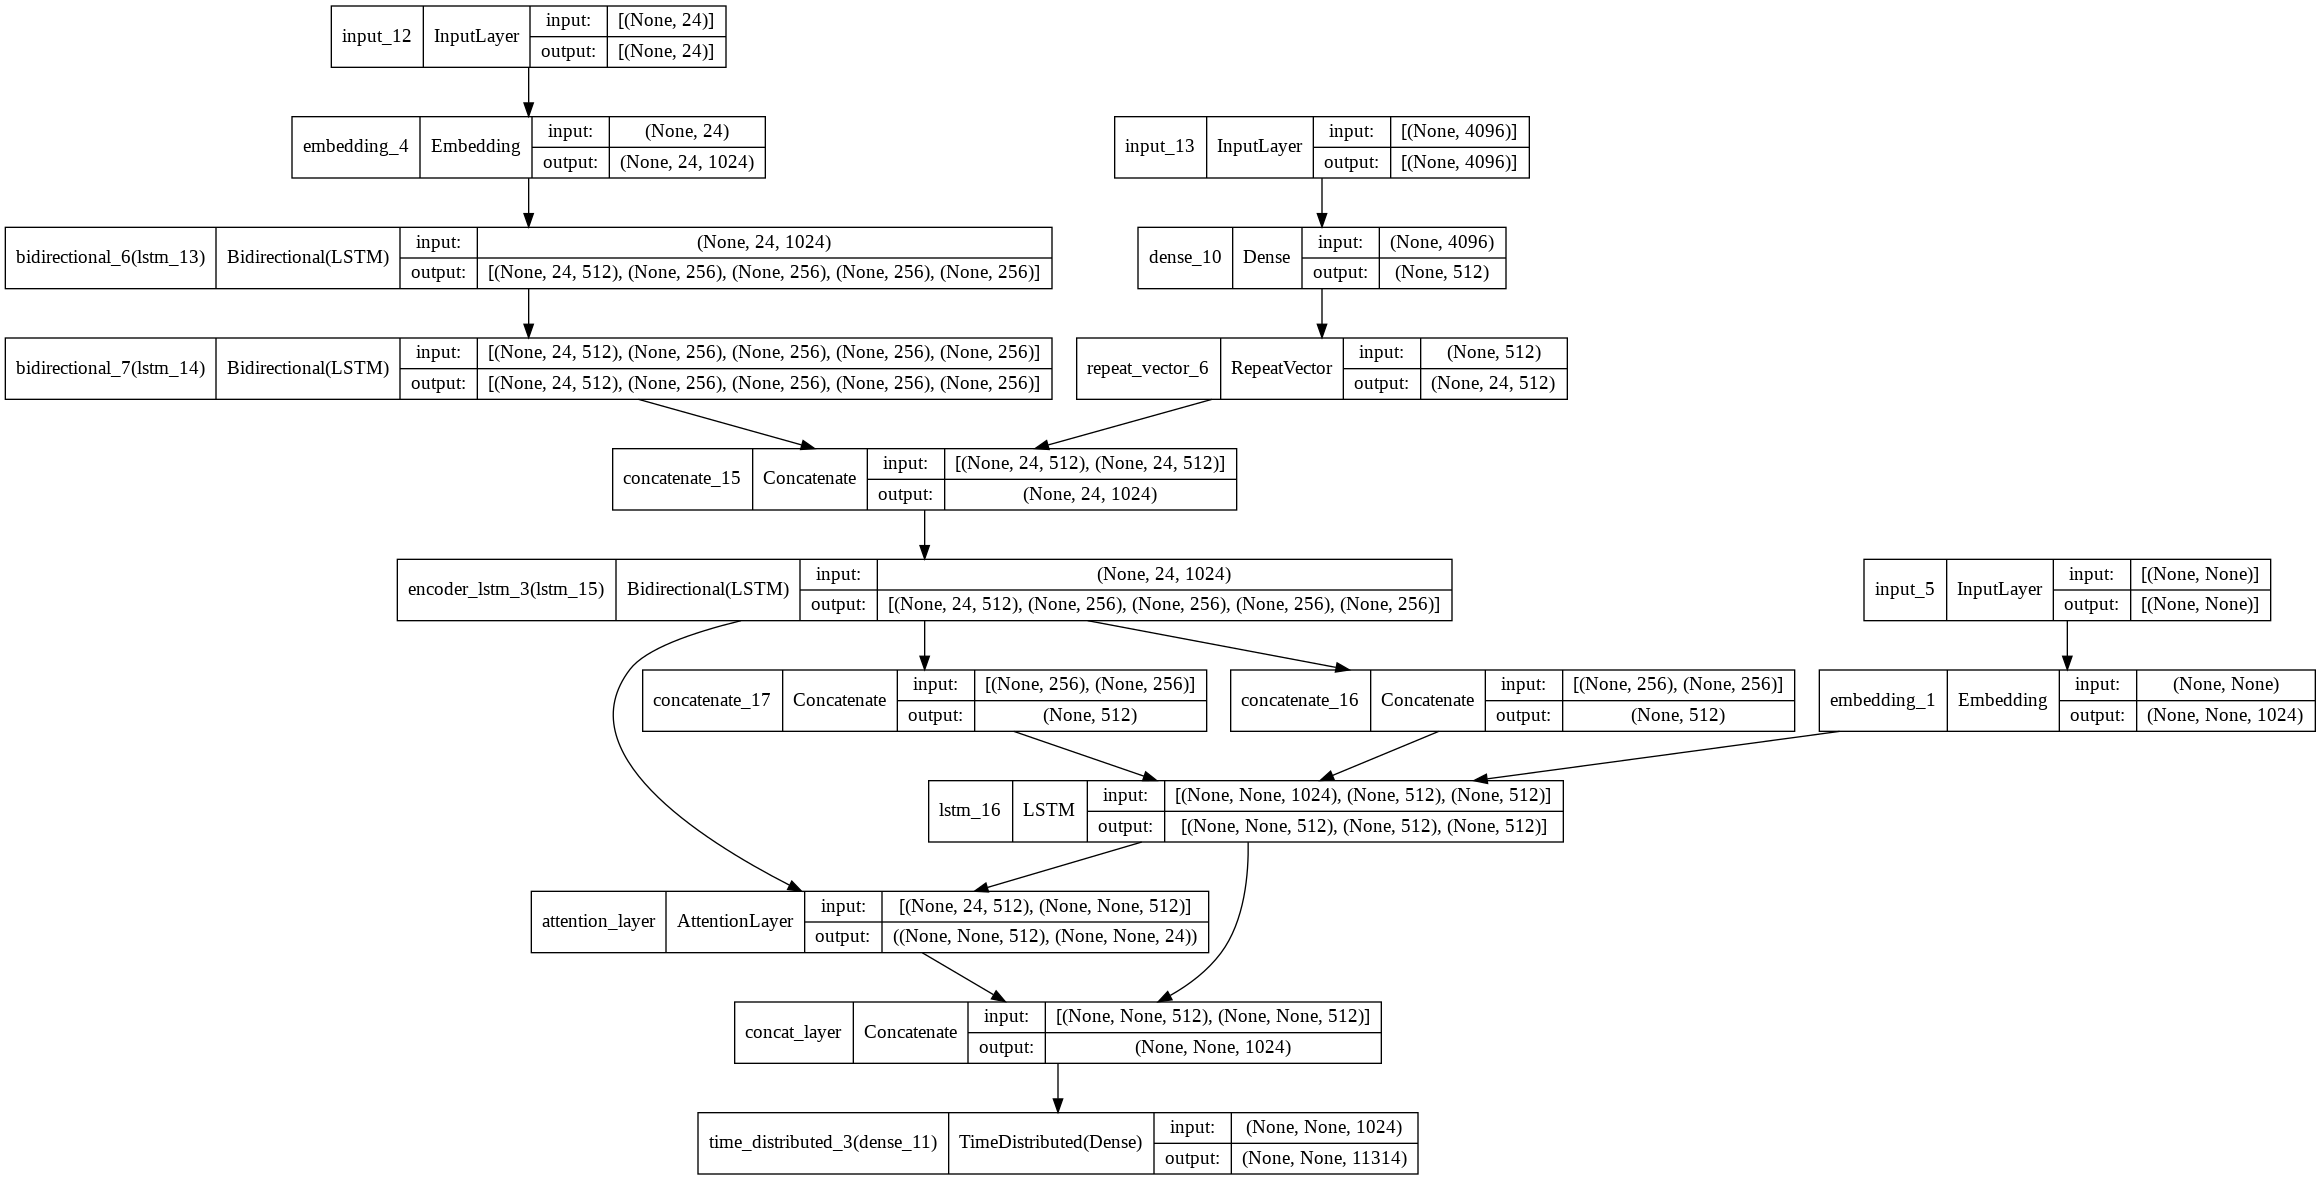

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

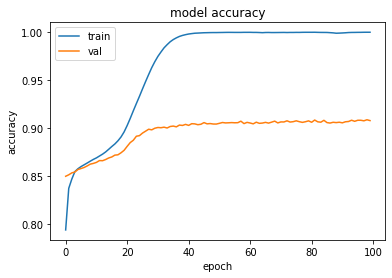

In [ ]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

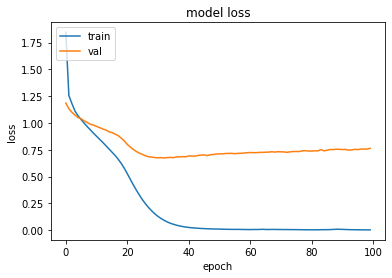

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
reverse_target_word_index=y_tokens.index_word

In [ ]:

reverse_source_word_index=x_tokens.index_word

In [ ]:
target_word_index=y_tokens.word_index

In [ ]:
# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=[encoder_inputs,img_inputs],outputs=[encoder_outputs,state_h,state_c])
encoder_model.summary()


Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 24)]         0           []                               
                                                                                                  
 embedding_4 (Embedding)        (None, 24, 1024)     5703680     ['input_12[0][0]']               
                                                                                                  
 input_13 (InputLayer)          [(None, 4096)]       0           []                               
                                                                                                  
 bidirectional_6 (Bidirectional  [(None, 24, 512),   2623488     ['embedding_4[0][0]']            
 )                               (None, 256),                                              

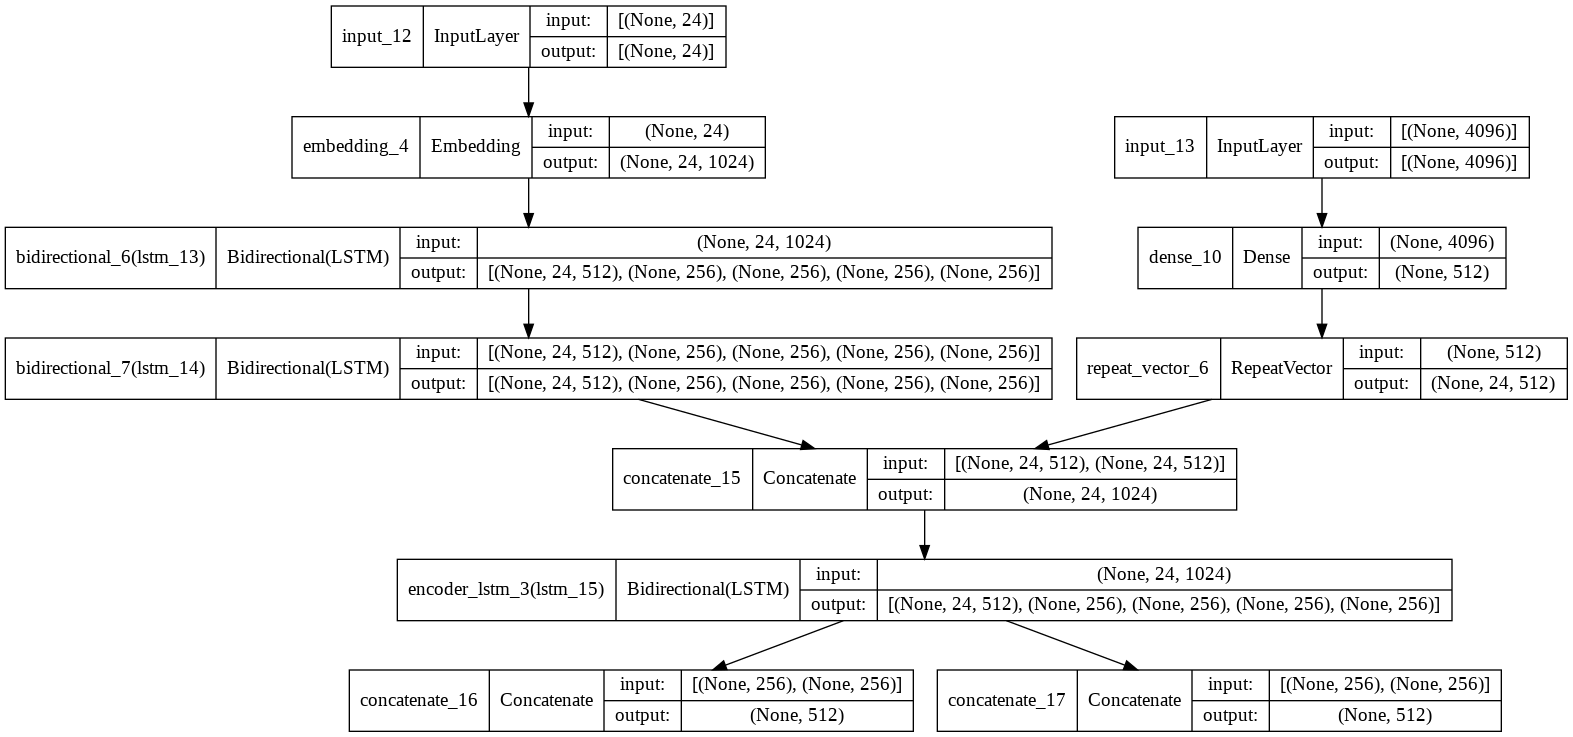

In [ ]:
tf.keras.utils.plot_model(
    encoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(512,))
decoder_state_input_c = Input(shape=(512,))
encoder_inf_states=Input(shape=(trmaxlen_english,512,))
decoder_hidden_state_input = Input(shape=(trmaxlen_english,512))
print(decoder_inputs.get_shape)
#print(dec_emb.get_shape)

<bound method KerasTensor.get_shape of <KerasTensor: shape=(None, None) dtype=float32 (created by layer 'input_5')>>


In [ ]:
dec_states = [decoder_state_input_h, decoder_state_input_c]

In [ ]:

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=dec_states)
attn_inf_out, attn_inf_states = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_inf_out])

In [ ]:

dec_states2= [state_h2, state_c2]

decoder_outputs2 = decoder_dense(decoder_inf_concat)

In [ ]:
decoder_model= Model(
                    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
                     [decoder_outputs2]+ dec_states2)

In [ ]:
decoder_model.summary()

Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 1024)   11585536    ['input_5[0][0]']                
                                                                                                  
 input_19 (InputLayer)          [(None, 512)]        0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 512)]        0           []                               
                                                                                           

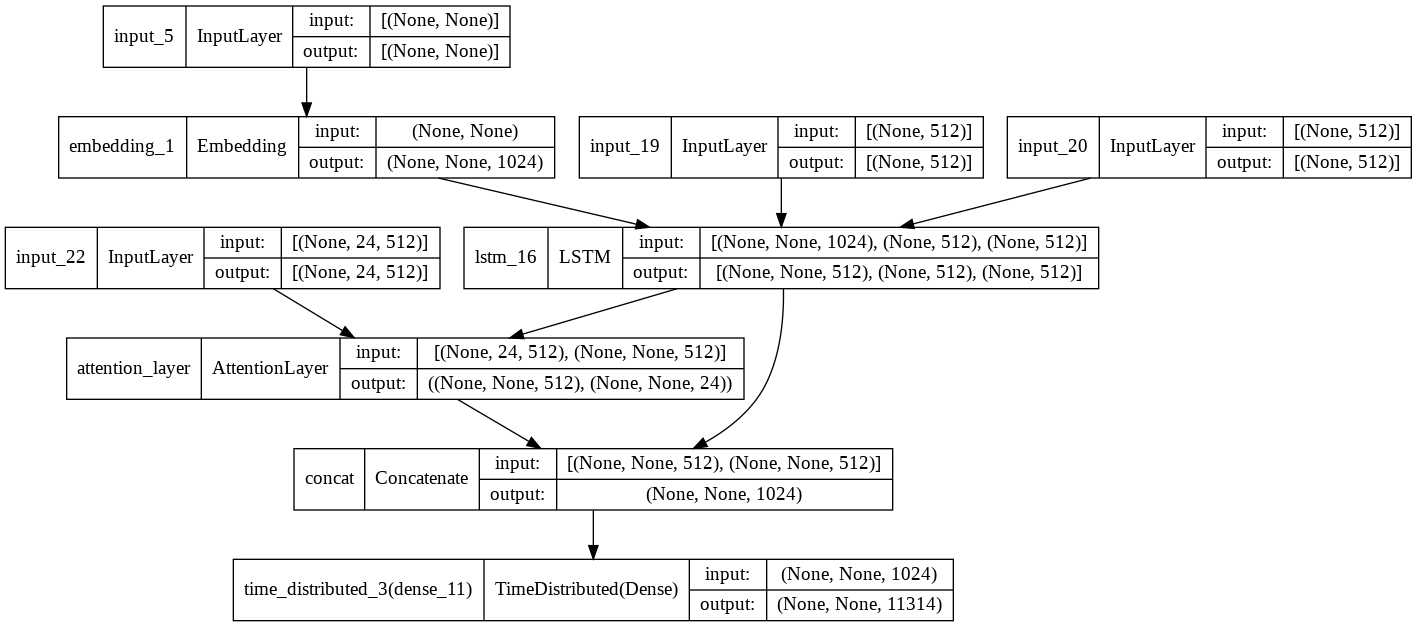

In [ ]:
tf.keras.utils.plot_model(
    decoder_model,
    to_file='model.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB'
)

In [ ]:
def decode_sequence(input_seq,img):
    img=img[np.newaxis,:]
    # Encode the input as state vectors.
    enc_output, enc_h, enc_c   = encoder_model.predict([input_seq,img])
    

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sos']

    stop_condition = False
    decoded_sentence = ''
    attention_weights=[]
    while not stop_condition:
      
        output_tokens, h, c  = decoder_model.predict([target_seq] + [enc_output, enc_h, enc_c ])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        if sampled_token_index == 0:
            break
        else:
            sampled_token = reverse_target_word_index[sampled_token_index]
        #attention_weights.append((sampled_token_index, attention))
        if(sampled_token!='eos'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eos'  or len(decoded_sentence.split()) >= (trmaxlen_malayalam -1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        enc_h, enc_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sos']) and i!=target_word_index['eos']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/My Drive/Main/modelfull2", monitor='val_accuracy')

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

callbacks_list = [checkpoint, early_stopping]

In [ ]:
for i in range(1):
    #print("Review:",seq2text(x_tt[i]))
    print("Original summary:",seq2summary(y_tt[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
    print("\n")

Original summary: മിഠായി വെളുത്ത സ്നോബോർഡിംഗ് പുല്ല് 
Predicted summary:  സമുദ്രത്തിൽ തരംഗദൈർഘ്യം




In [ ]:
#error due to probelm in test data
for i in range(10):
    #print("Review:",seq2text(x_tt[i]))
    print("Original summary:",seq2summary(y_tt[i]))
    print("Predicted summary:",decode_sequence(x_tr[i].reshape(1,trmaxlen_english),testvgg_feature[i]))
    print("\n")

Original summary: മിഠായി വെളുത്ത സ്നോബോർഡിംഗ് പുല്ല് 
Predicted summary:  സമുദ്രത്തിൽ തരംഗദൈർഘ്യം


Original summary: ക്യാമറയിലേക്ക് പിച്ചർ ചെയ്യുന്നു നിറത്തിലുള്ള വെളുത്ത 
Predicted summary:  ഭാഗികമായി കഴിച്ച പിസ്സ


Original summary: കഴുത്ത് ഒരു കോഫി 
Predicted summary:  കമ്പ്യൂട്ടർ സ്ക്രീനുകൾ ഓണാണ്


Original summary: ധരിക്കുന്ന മുറിയിലെ ഘടിപ്പിച്ചിരിക്കുന്നു ഇതൊരു അകലെ ഭക്ഷണം 
Predicted summary:  മനുഷ്യൻ ചെറിയ വണ്ടി വലിക്കുന്നു


Original summary: റാക്കറ്റ് സോസ് ഘടികാരം പാർക്ക് ഇതൊരു സ്കേറ്റ്ബോർഡിൽ 
Predicted summary:  ചില ആളുകൾ ഒരു റാലിയിലാണ്


Original summary: വര ഒരു ആളുകൾ കിടക്കുന്നു 
Predicted summary:  കറുത്ത കാറിനടുത്ത് ഒരു കൂട്ടം പെൺകുട്ടികളുണ്ട്


Original summary: പുല്ലിൽ പോൾ ഗ്ലാസ് പെയിന്റ് ബോട്ടിൽ വ്യക്തി 
Predicted summary:  ഒരു കുട്ടിയുടെ കാൽ


Original summary: ബോൾ സർഫർ വെള്ള കറുത്ത ഷർട്ടിൽ വയലിൽ ഉള്ള 
Predicted summary:  ഉയരമുള്ള മെറ്റൽ ലൈറ്റ്പോസ്റ്റ്


Original summary: ചാരനിറത്തിലുള്ള കുതിരകൾ വലിയ 
Predicted summary:  മതിൽ വെളുത്ത നിറമാണ്


Original summary: ബസ് ത

In [ ]:
!pip install sacrebleu
import sacrebleu
import random

     |████████████████████████████████| 90 kB 5.8 MB/s 


In [ ]:
temp_o=[]
temp_p=[]
for i in range(50):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,trmaxlen_english),vgg_train_[s]))

bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

100.00000000000004


In [ ]:
temp_o=[]
temp_p=[]
for i in range(1000):
    s=random.randint(0,len(y_tr)-1)
    temp_o.append(seq2summary(y_tr[s]))
    temp_p.append(decode_sequence(x_tr[s].reshape(1,trmaxlen_english),vgg_train_[s]))


bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

24.718587015299352


In [ ]:
temp_o=[]
temp_p=[]
for i in range(1000):
    s=random.randint(0,len(y_tt)-1)
    temp_o.append(seq2summary(y_tt[s]))
    temp_p.append(decode_sequence(x_tt[s].reshape(1,trmaxlen_english),testvgg_feature[s]))


In [ ]:
bleu = sacrebleu.corpus_bleu(temp_o, [temp_p],lowercase=True, tokenize='intl')
print(bleu.score)

0.08486582955725616
